In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.__version__

'0.11.1'

In [5]:
student = pd.read_csv('./StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


```countplot```을 통하여 막대그래프를 그린다.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

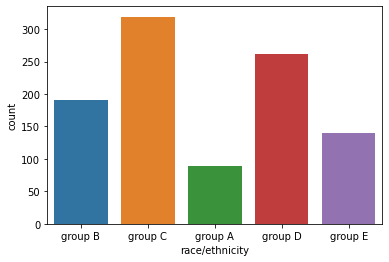

In [12]:
sns.countplot(x='race/ethnicity', data=student)

<AxesSubplot:xlabel='count', ylabel='race/ethnicity'>

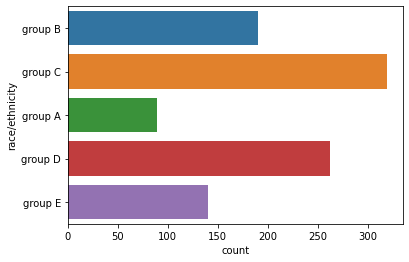

In [13]:
sns.countplot(y='race/ethnicity', data=student)

<AxesSubplot:xlabel='gender', ylabel='count'>

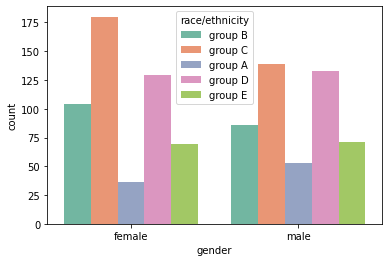

In [32]:
sns.countplot(x='gender', data=student,
              hue='race/ethnicity',  # hue 는 색을 의미하는데, 데이터의 구분 기준을 정하여 색상을 통해 내용을 구분한다
              # color='red',  # color 사용하여 hue의 색상 팔레트를 바꾼다
              palette='Set2',  # palette 를 이용하여 색을 변경한다
              # saturation=.5,
              order=sorted(student['gender'].unique()))  # order 를 사용하여 순서를 명시하기

```matplotlib```를 이용하여 한 번에 두개의 seaborn 그래프를 그릴 수 있다.

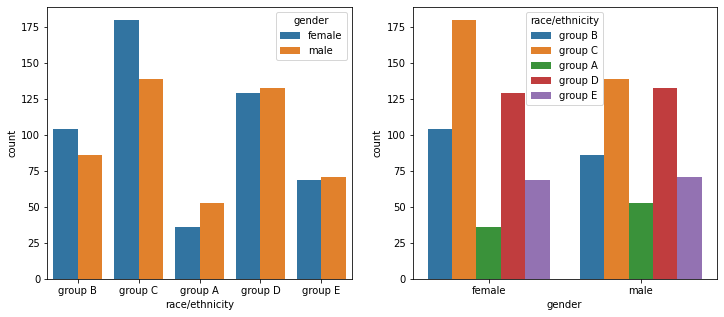

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='race/ethnicity', data=student,
              hue='gender',
              ax=axes[0])

sns.countplot(x='gender', data=student,
              hue='race/ethnicity',
              ax=axes[1])

plt.show()

# 1. Categorical API

In [34]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 1-1. Boxplot

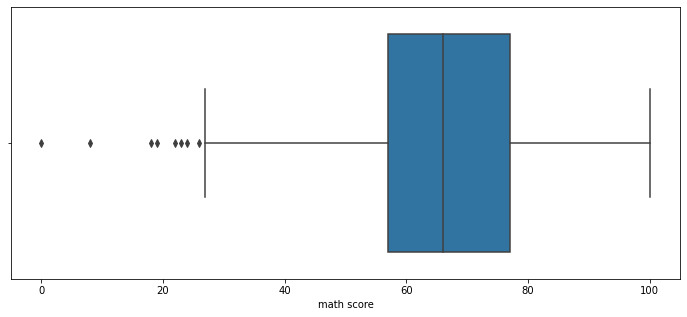

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.boxplot(x='math score', data=student, ax=ax)
plt.show()

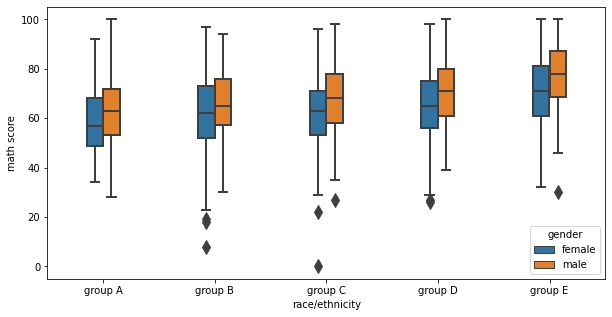

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x='race/ethnicity', y='math score', data=student,
            order=sorted(student['race/ethnicity'].unique()),
            hue='gender',
            width=.3,
            fliersize=10,
            linewidth=2,
            ax=ax)
plt.show()

## 1-2. Violin Plot

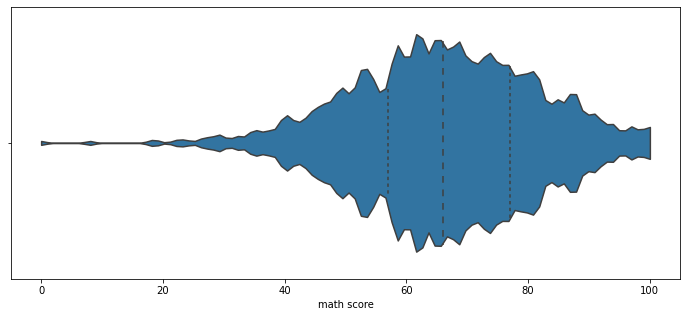

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.violinplot(x='math score', data=student,
               bw=.05,  # 분포 표현을 얼마나 자세하게 보여줄 것인가 ('scott', 'silverman', float)
               cut=0,  # 끝부분을 얼마나 자를것인가 (float)
               inner='quartile',  # 내부를 어떻게 표현할 것인가 ('box', 'quartile', 'point', 'stick', None)
               ax=ax)
plt.show()

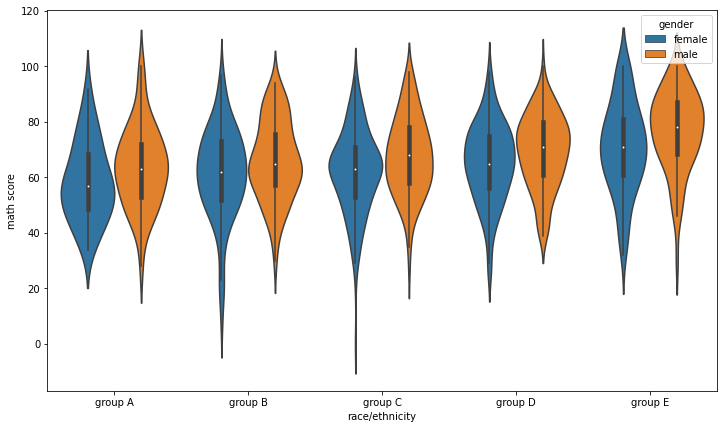

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.violinplot(x='race/ethnicity', y='math score', data=student, ax=ax,
               hue='gender',
               order=sorted(student['race/ethnicity'].unique()))
plt.show()

```split``` 을 사용할 경우 위 그래프가 아래와 같이 나타난다

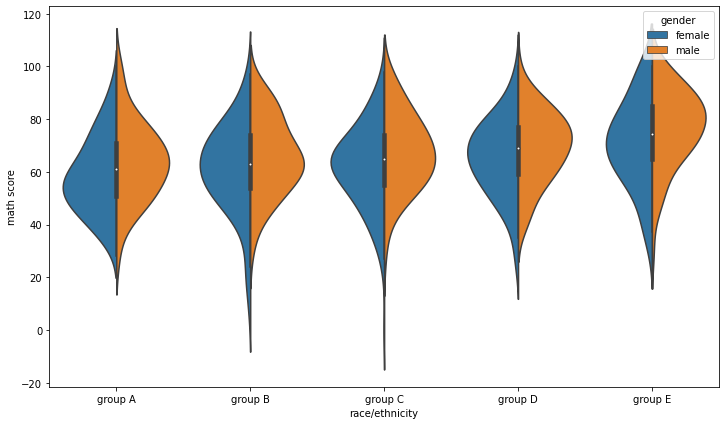

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.violinplot(x='race/ethnicity', y='math score', data=student, ax=ax,
               hue='gender',
               split=True,
               order=sorted(student['race/ethnicity'].unique()),
               bw=0.5)
plt.show()

## 1-3. ETC

### ```boxenplot```, ```swarmplot```, ```stripplot```

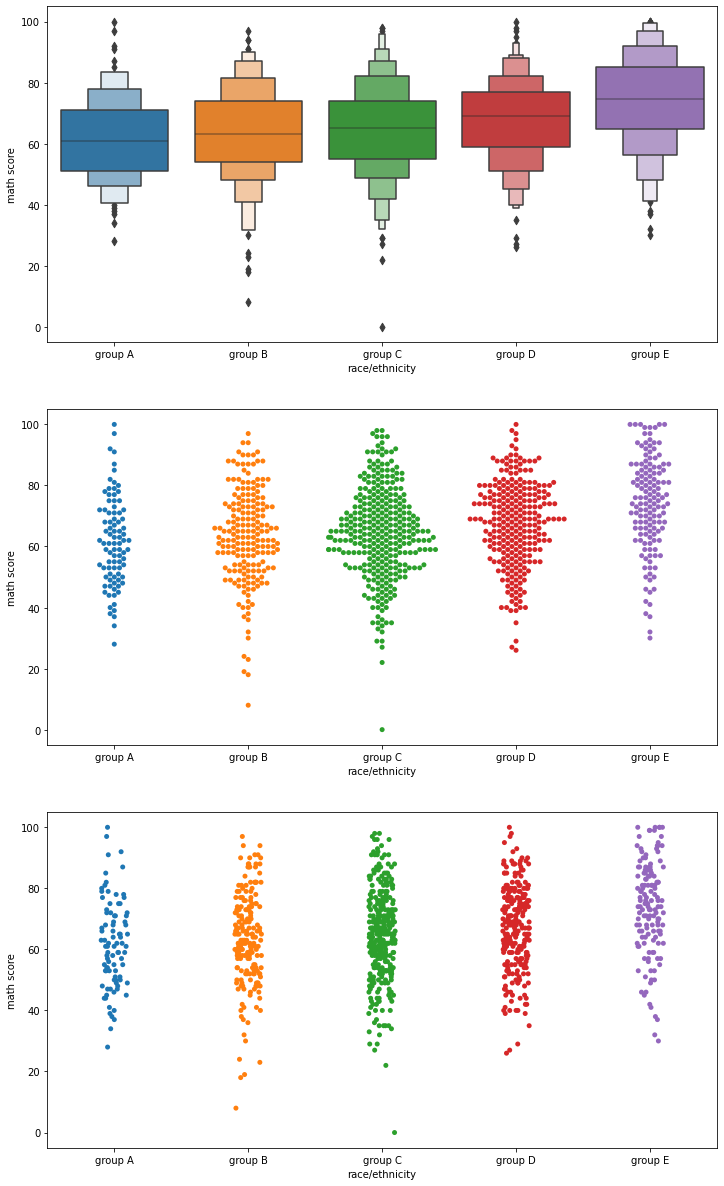

In [64]:
fig, axes = plt.subplots(3, 1, figsize=(12, 21))

sns.boxenplot(x='race/ethnicity', y='math score', data=student, ax=axes[0],
              order=sorted(student['race/ethnicity'].unique()),
              )

sns.swarmplot(x='race/ethnicity', y='math score', data=student, ax=axes[1],
              order=sorted(student['race/ethnicity'].unique()),
              )

sns.stripplot(x='race/ethnicity', y='math score', data=student, ax=axes[2],
              order=sorted(student['race/ethnicity'].unique()),
              )

plt.show()

# 2. Distribution

## 2-1. Univariate Distribution

* ```histplot```: 히스토그램
* ```kdeplot```: Kernel Density Estimate
* ```ecdfplot```: 누적 밀도 함수
* ```rugplot```: 선을 사용한 밀도함수

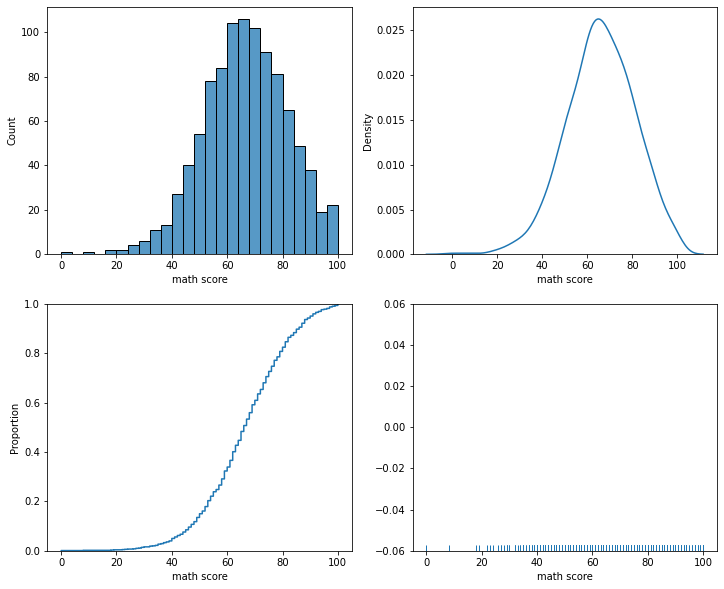

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

sns.histplot(x='math score', data=student, ax=axes[0])
sns.kdeplot(x='math score', data=student, ax=axes[1])
sns.ecdfplot(x='math score', data=student, ax=axes[2])
sns.rugplot(x='math score', data=student, ax=axes[3])

plt.show()

### 2-1-1 histplot
* ```binwidth```: 막대의 너비 
* ```bins```: 막대의 개수
* ```element```: 기본적으로는 막대지만, 다른 표현 가능 (step, poly)

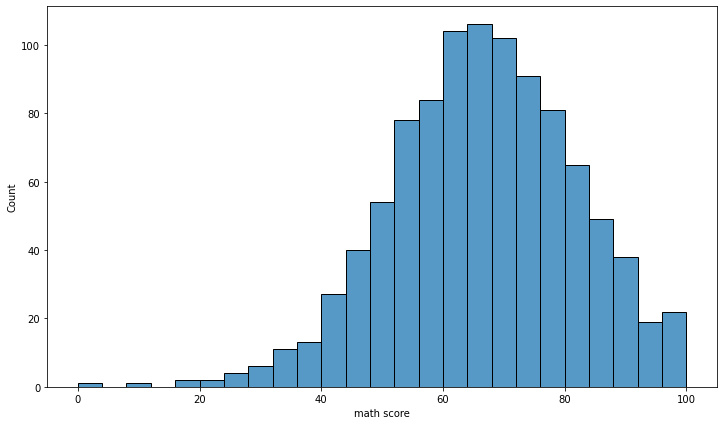

In [75]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.histplot(x='math score', data=student, ax=ax,
             # binwidth=10,
             bins=25,
             # element='step'
            )

plt.show()

histogram에 N개의 분포를 표현할 때  
```multiple``` 속성을 준다 (layer, dodge, stack, fill)

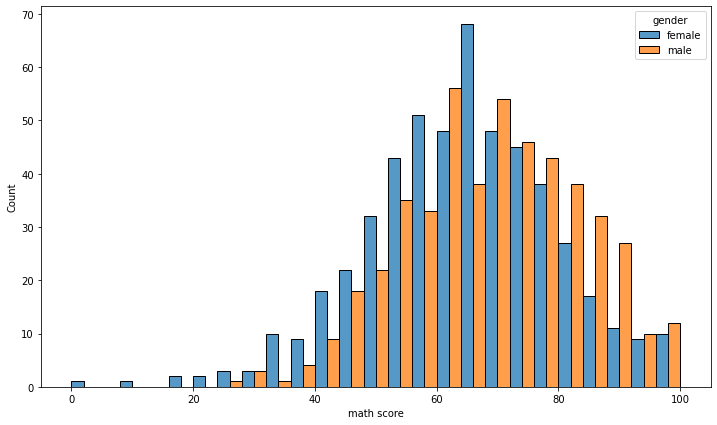

In [81]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.histplot(x='math score', data=student, ax=ax,
             hue='gender',
             multiple='dodge'
            )

plt.show()

### 2-1-2. kdeplot
* ```fill```을 사용하여 안을 채워준다
* ```bw_method```를 사용하여 분포를 더 자세히 표현한다

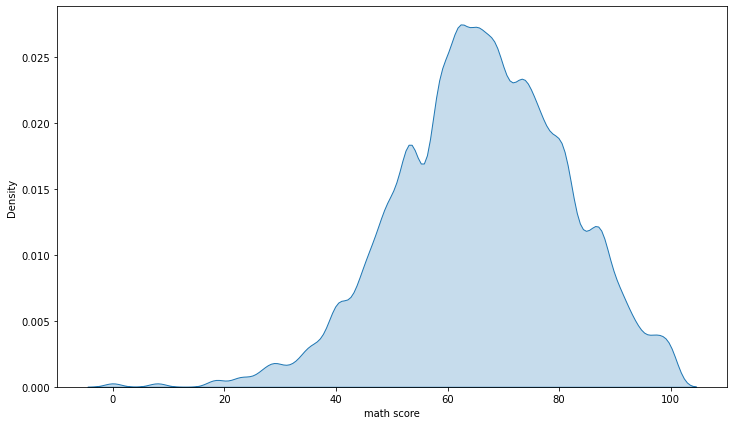

In [85]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='math score', data=student, ax=ax,
            fill=True,
            bw_method=0.1,
           )
plt.show()

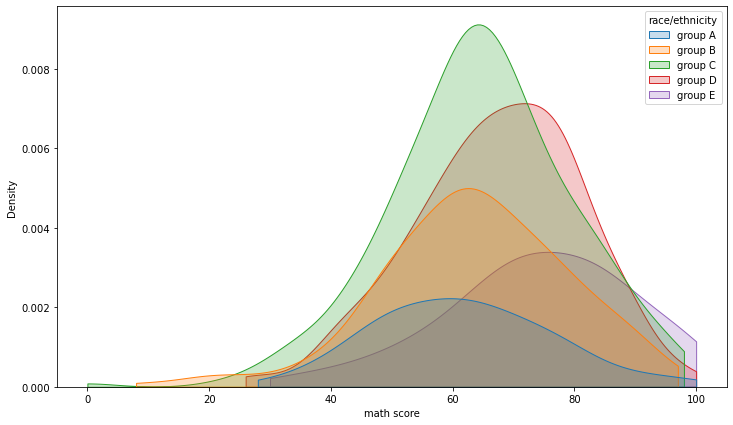

In [95]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='math score', data=student, ax=ax,
            fill=True,
            hue='race/ethnicity',
            hue_order=sorted(student['race/ethnicity'].unique()),
            multiple='layer',  # layer, stack, fill
            cut=0,
            # cumulative=True  # 누적합
           )
plt.show()

### 2-1-3. ecdfplot

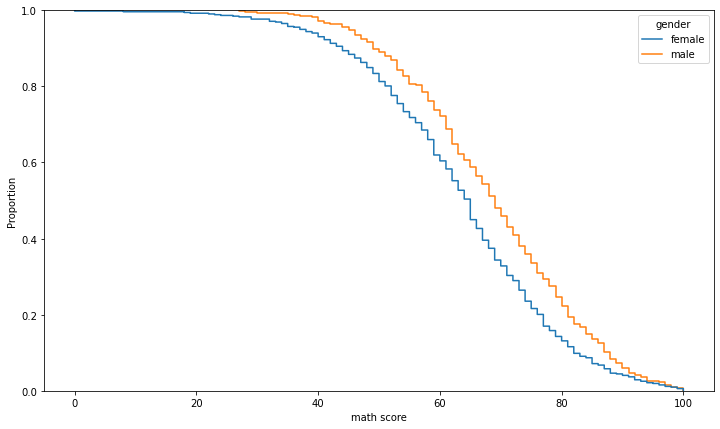

In [100]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.ecdfplot(x='math score', data=student, ax=ax,
             hue='gender',
             stat='proportion',  # count, proportion
             complementary=True,
            )
plt.show()

### 2-1-4. rugplot

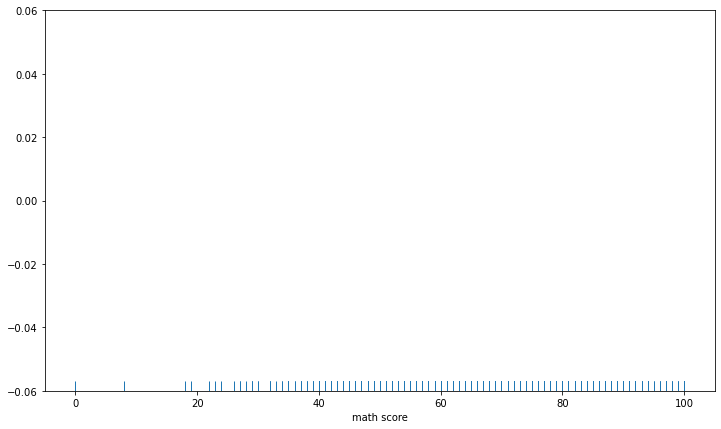

In [101]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.rugplot(x='math score', data=student, ax=ax)
plt.show()

## 2-2. Bivariate Distribution

```scatter``` 보다 ```histplot```이 특정 구간의 밀도를 더 잘 표현할 수 있다.

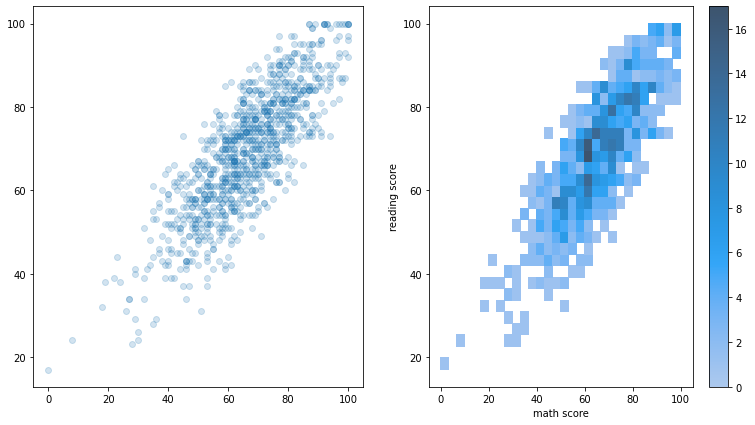

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(13, 7))
ax.set_aspect(1)

axes[0].scatter(student['math score'], student['reading score'], alpha=0.2)

sns.histplot(x='math score', y='reading score',
             data=student, ax=axes[1],
             # color='orange',
             cbar=True,
             bins=(30, 30),
            )

plt.show()

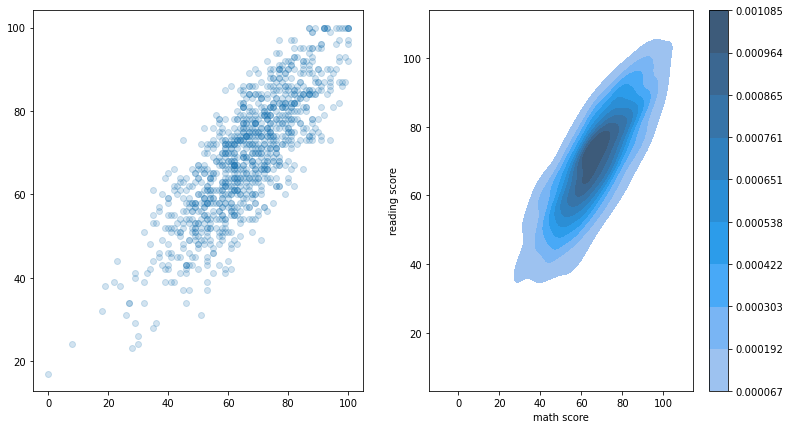

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(13, 7))
ax.set_aspect(1)

axes[0].scatter(student['math score'], student['reading score'], alpha=0.2)

sns.kdeplot(x='math score', y='reading score',
            data=student, ax=axes[1],
            fill=True,
            cbar=True,
            # bw_method=0.1,
           )

plt.show()

# 3. Relation & Regression

## 3-1. Scatter Plot

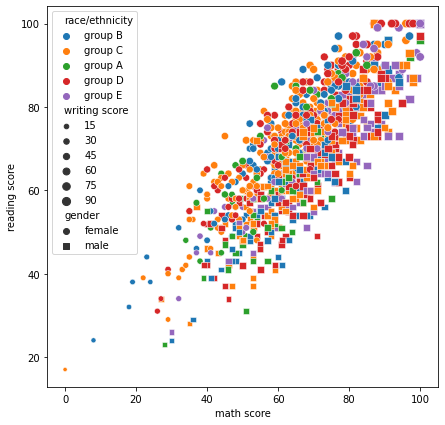

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(x='math score', y='reading score', data=student,
                style='gender',
                markers={'male':'s', 'female':'o'},  # marker 모양
                hue='race/ethnicity',  
                size='writing score'  # marker의 크기
               )
plt.show()

## 3-2. Line Plot

In [121]:
# seaborn 에서 기본 제공하는 데이터
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [123]:
flights_wide = flights.pivot('year', 'month', 'passengers')
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


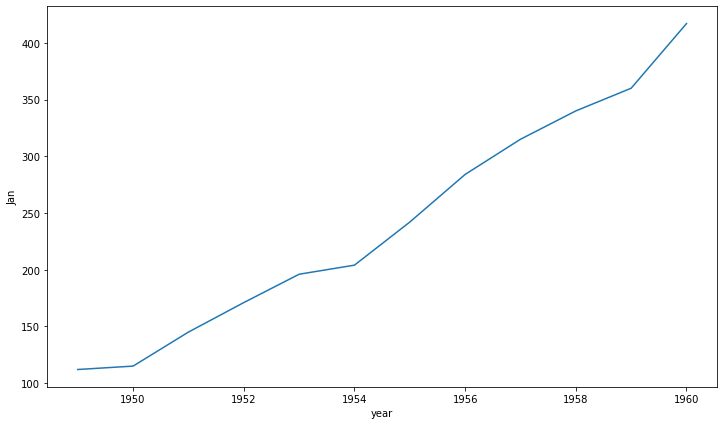

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.lineplot(x='year', y='Jan', data=flights_wide, ax=ax)
plt.show()

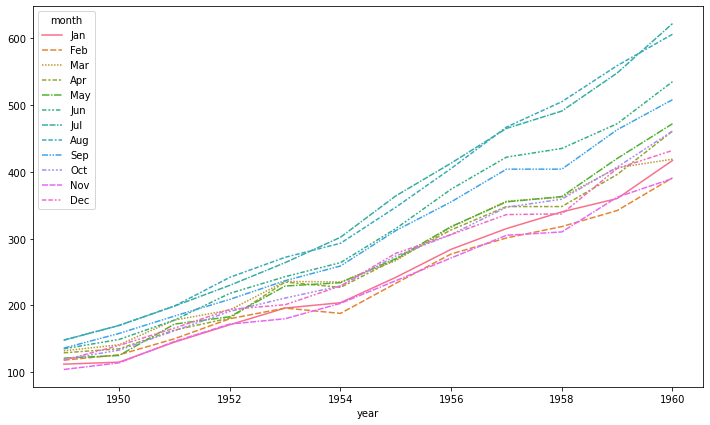

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.lineplot(data=flights_wide, ax=ax)
plt.show()

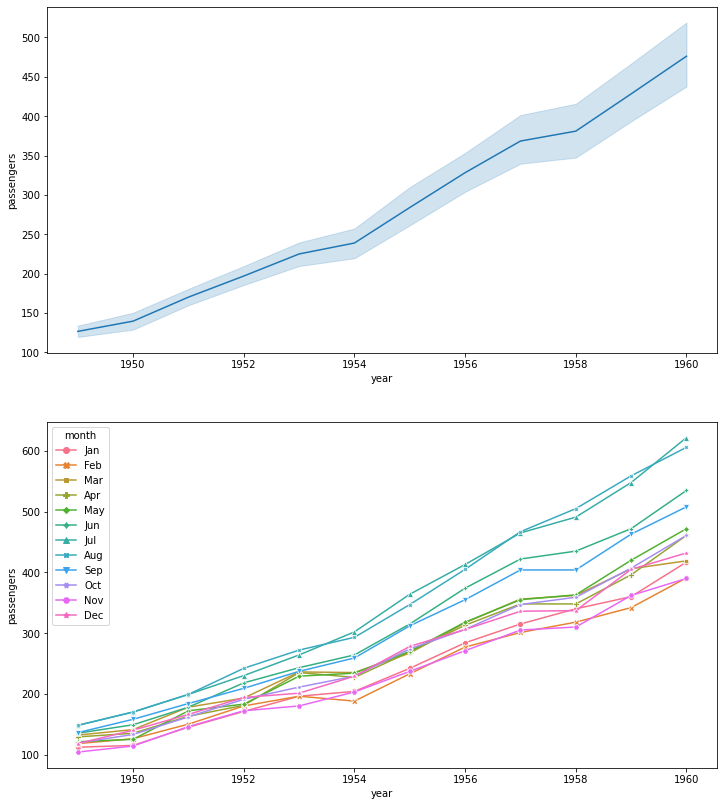

In [137]:
# 기존 데이터
# 자동으로 평균과 표준편차로 오차범위를 시각화해줌
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

sns.lineplot(data=flights, x='year', y='passengers', ax=axes[0])

sns.lineplot(data=flights, x='year', y='passengers',
             hue='month',
             style='month',
             markers=True,
             dashes=False,
             ax=axes[1])

plt.show()

## 3-3. Regplot
회귀선을 추가한 scatter plot

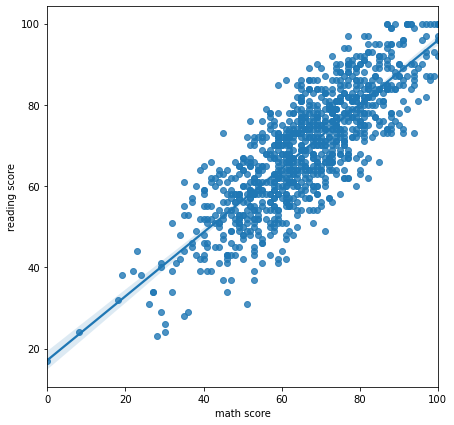

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.regplot(x='math score', y='reading score', data=student,
            # x_estimator=np.mean,  # 한 축에 한 개의 값만 보여주기 위해서 씀
            # x_bins=20,  # 보여주는 개수 지정
            # order=2,  # 다차원 회귀선은 order를 통하여 지정
            # logx=True  # 로그 사용도 가능
           )
plt.show()

# 4. Matrix Plots

## 4-1. Heatmap

대표적으로 상관관계(correlation) 시각화에 많이 쓰임

In [144]:
student.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [145]:
# heart.csv 사용
heart = pd.read_csv('./heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [146]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


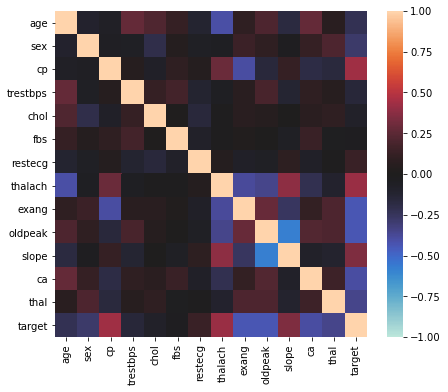

In [151]:
# heart.corr()를 시각화한 그래프
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(heart.corr(), ax=ax,
            vmin=-1, vmax=1,  # 상관계수는 -1 ~ 1까지 이므로 vmin, vmax를 이용하여 범위를 조정한다
            center=0,  # 0을 기준으로 음/양이 중요하므로 center를 지정해준다
           )
plt.show()

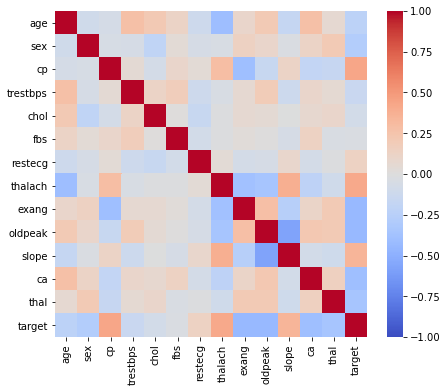

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(heart.corr(), ax=ax,
            vmin=-1, vmax=1,
            center=0,
            cmap='coolwarm'  # cmap을 사용하여 가독성을 높힌다
           )
plt.show()

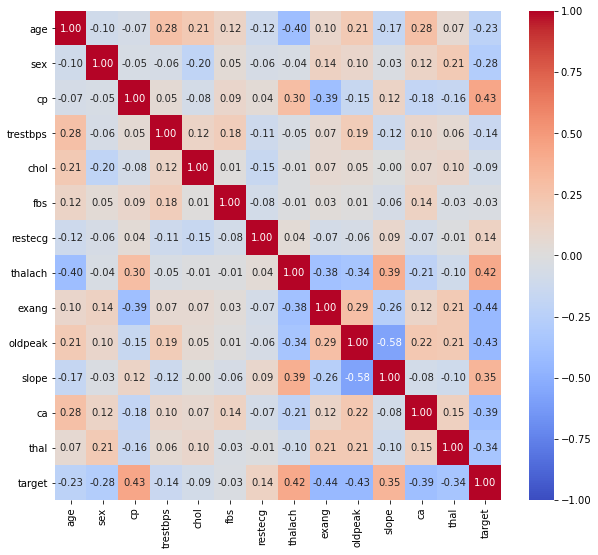

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
sns.heatmap(heart.corr(), ax=ax,
            vmin=-1, vmax=1,
            center=0,
            cmap='coolwarm',
            annot=True,  # annot를 사용하여 실제 값에 들어갈 내용을 작성한다
            fmt='.2f',  # 실제 들어가는 값의 정확도 설정 (포맷 설정) (정수는 d 사용)
           )
plt.show()

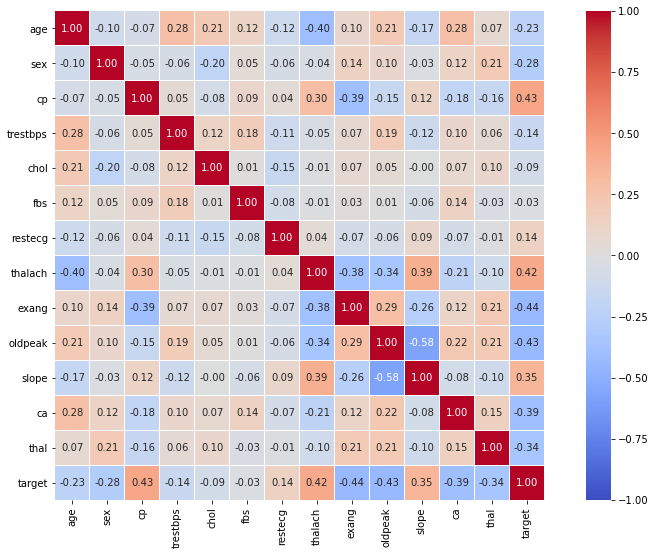

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(heart.corr(), ax=ax,
            vmin=-1, vmax=1,
            center=0,
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            linewidth=0.1,  # 칸 사이를 나눌 수 있음
            square=True,  # 그래프가 직사각형일 때 정사각형으로 표현 가능
           )
plt.show()

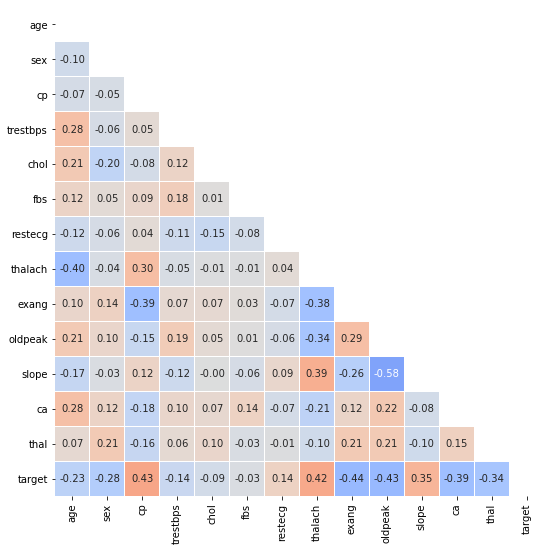

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))

# 마스크를 사용하여 특정 부분만 보여줄 수 있음
mask = np.zeros_like(heart.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heart.corr(), ax=ax,
            vmin=-1, vmax=1,
            center=0,
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            linewidth=0.1,
            square=True,
            mask=mask,  # 마스크 적용
            cbar=False
           )
plt.show()